<a href="https://colab.research.google.com/github/dmorton714/2023_lmg_sal/blob/main/lmg_salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
from sklearn.linear_model import LinearRegression

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Functions

In [3]:
def OT(year):
    df_filtered = df[df['CalYear'] == year]
    df_filtered = df_filtered[df_filtered['Overtime_Rate'] > df_filtered['Regular_Rate']]
    # df_filtered = df_filtered.sort_values(by='YTD_Total', ascending=False)
    return df_filtered

In [4]:
def Dep_yearly(year):
    pd.options.display.float_format = '{:.2f}'.format
    department = df[df['CalYear'] == year]
    department = department.groupby(['CalYear', 'Department'])['YTD_Total'].sum().reset_index()
    department = department.sort_values(by='YTD_Total', ascending=False)
    department.head()
    return department


# Data read

In [5]:
df = pd.read_csv("../data/Louisville_Metro_KY_-_Employee_Salary_Data.csv")

# Calculating pay rate and hours

In [6]:
df['Hr_Rate'] = df['Regular_Rate'] / 2080
df['Ot_Rate'] = df['Hr_Rate'] * 1.5
df['Hr_Worked'] = df['Overtime_Rate'] / df['Ot_Rate'] / 52 + 40
df = df.sort_values(by='Hr_Worked', ascending=False)

# annual spends by department

In [7]:
a23 = Dep_yearly(2023)
a23.head()


,CalYear,Department,YTD_Total
21,2023,Louisville Metro Police Department,83367893.59
19,2023,Louisville Fire,29064660.74
7,2023,Department of Corrections,21325721.53
43,2023,Public Works & Assets,18136863.33
41,2023,Parks & Recreation,9094567.44


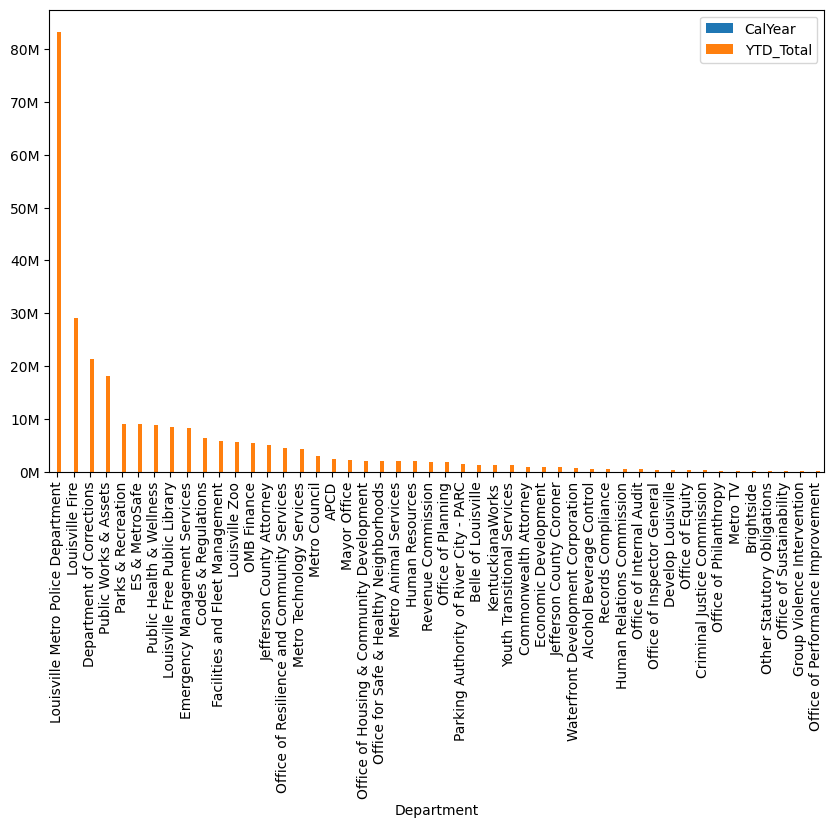

In [8]:
ax = a23.plot.bar(x='Department')
def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.gcf().set_size_inches(10, 6)
plt.show()


In [9]:
a22 = Dep_yearly(2022)
a22.head()

,CalYear,Department,YTD_Total
18,2022,Louisville Metro Police Department,122408545.28
16,2022,Louisville Fire,46005415.57
5,2022,Department of Corrections,31309541.30
36,2022,Public Works & Assets,27354485.59
35,2022,Public Health & Wellness,13521323.53


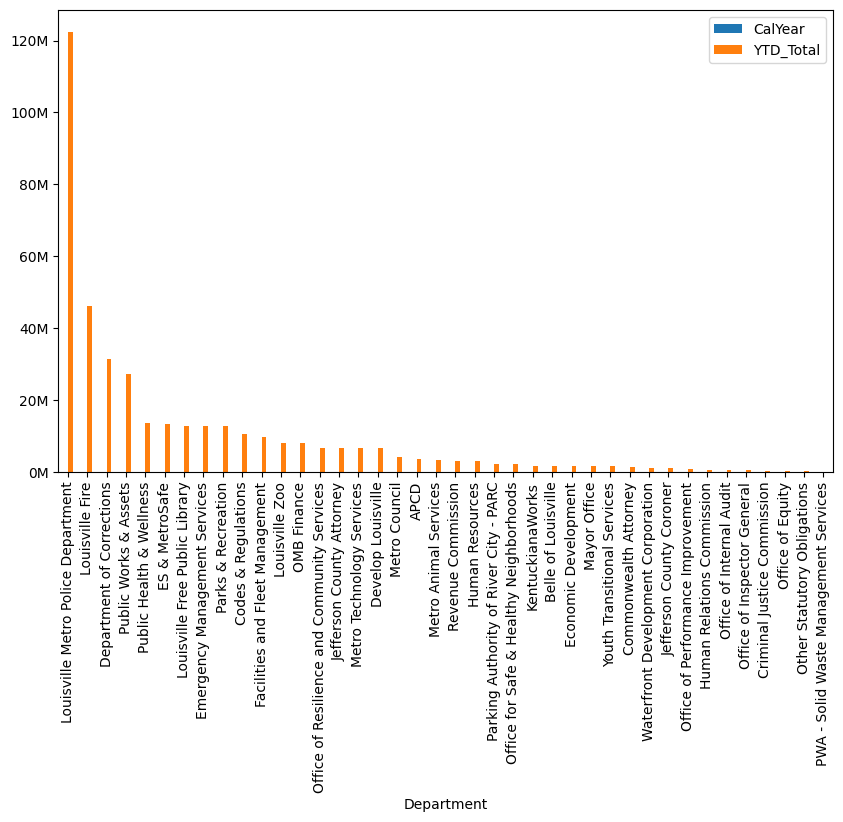

In [10]:
ax = a22.plot.bar(x='Department')
def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.gcf().set_size_inches(10, 6)
plt.show()

In [11]:
a21 = Dep_yearly(2021)
a21.head()

,CalYear,Department,YTD_Total
19,2021,Louisville Metro Police,103384082.76
17,2021,Louisville Fire,38486015.90
23,2021,Metro Corrections,25095920.18
32,2021,Public Works,20623255.14
35,2021,Solid Waste Management,11935606.39


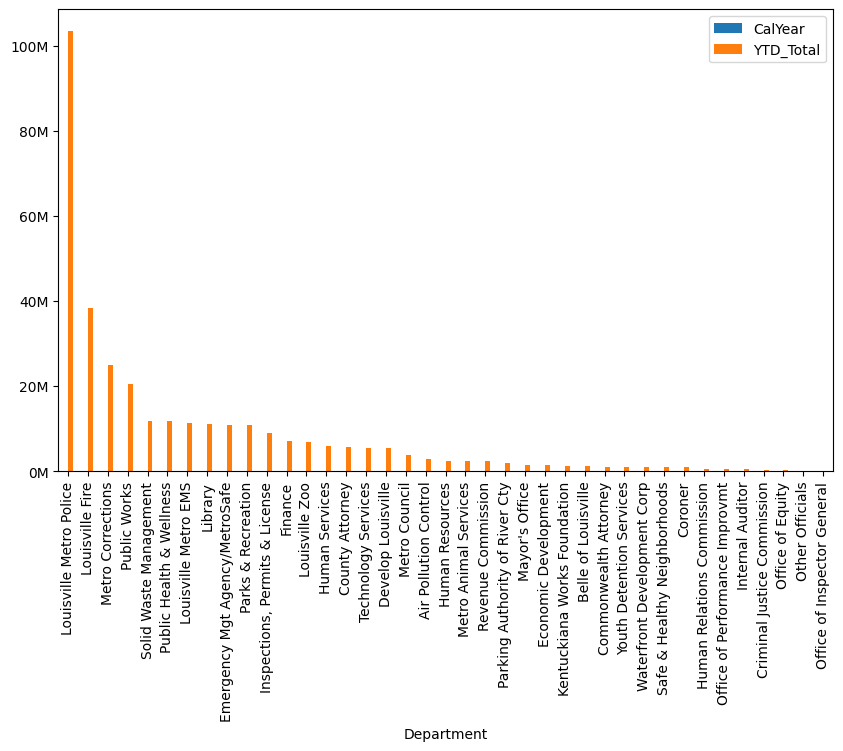

In [12]:
ax = a21.plot.bar(x='Department')
def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.gcf().set_size_inches(10, 6)
plt.show()

In [13]:
a20 = Dep_yearly(2020)
a20.head()

,CalYear,Department,YTD_Total
19,2020,Louisville Metro Police,106152700.67
17,2020,Louisville Fire,37338873.90
23,2020,Metro Corrections,27273229.14
30,2020,Public Works,20951384.90
18,2020,Louisville Metro EMS,12927855.91


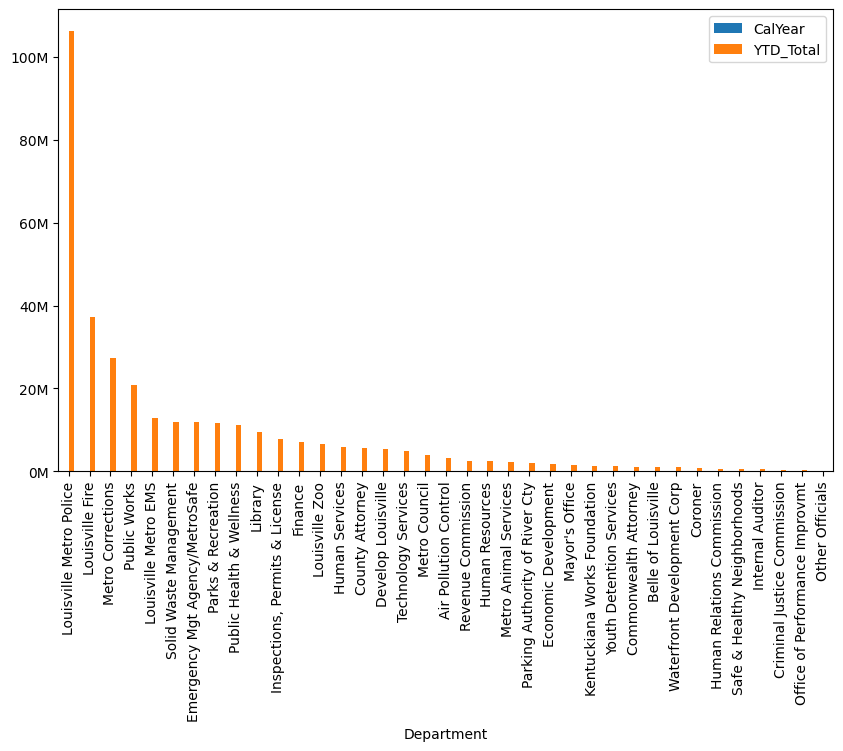

In [14]:
ax = a20.plot.bar(x='Department')
def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.gcf().set_size_inches(10, 6)
plt.show()

# overtime over 66 hours

In [15]:
df23 = OT(2023)
df23.head()

,CalYear,Employee_Name,Department,jobTitle,Annual_Rate,Regular_Rate,Overtime_Rate,Incentive_Allowance,Other,YTD_Total,ObjectId,Hr_Rate,Ot_Rate,Hr_Worked
9291,2023,"Ingram, Lydia Ann",Louisville Metro Police Department,LMPD Service Center Technician,41995.20,0.00,151.43,0.00,0.00,151.43,9292,0.00,0.00,inf
12002,2023,"Watson, Danny W",Parks & Recreation,Golf Operations Supervisor I,44075.20,0.00,84.76,0.00,1084.10,1168.86,12003,0.00,0.00,inf
8740,2023,"Herndon, Adam B",Louisville Fire,Fire Apparatus Operator 56hr,67362.05,29236.09,67251.84,20709.72,485.76,117683.41,8741,14.06,21.08,101.34
7579,2023,"Murphy, Paul P.",Louisville Fire,Fire Apparatus Operator 56hr,67362.05,28539.73,63041.27,25585.91,0.00,117166.91,7580,13.72,20.58,98.90
6821,2023,"Hudson, Daryell W",Louisville Fire,Fire Apparatus Operator 56hr,67362.05,25227.89,51028.06,21927.44,9534.94,107718.33,6822,12.13,18.19,93.94


<Axes: >

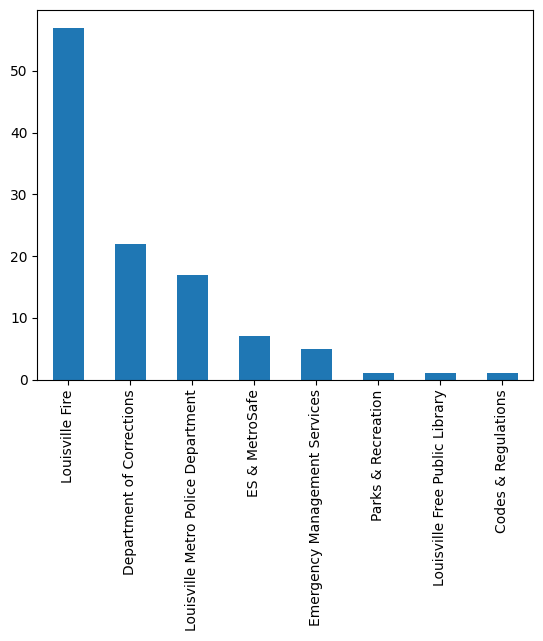

In [22]:
df23['Department'].value_counts().plot.bar()

In [ ]:
df22 = OT(2022)
df22.head()

,CalYear,Employee_Name,Department,jobTitle,Annual_Rate,Regular_Rate,Overtime_Rate,Incentive_Allowance,Other,YTD_Total,ObjectId,Hr_Rate,Ot_Rate,Hr_Worked
955,2022,"Nicholson, David L",Other Statutory Obligations,Ex Officio Librarian-Law Libr,1300.00,350.00,1100.00,0.00,0.00,1450.00,956,0.17,0.25,123.81
1539,2022,"Standard, Royce Leshawn",Department of Corrections,Corrections Officer,58156.80,59001.79,125713.91,1500.00,2234.32,188450.02,1540,28.37,42.55,96.82
760,2022,"Murphy, Paul P.",Louisville Fire,Fire Apparatus Operator 56hr,67362.05,47533.53,101227.36,41318.93,2823.86,192903.68,761,22.85,34.28,96.79
389,2022,"Hudson, Daryell W",Louisville Fire,Fire Apparatus Operator 56hr,67362.05,47736.95,100539.66,43853.33,2500.00,194629.94,390,22.95,34.43,96.16
373,2022,"Brown, Viola Oneal",ES & MetroSafe,Communication Specialist II,60798.40,56893.87,113958.61,8102.82,2924.88,181880.18,374,27.35,41.03,93.41


In [ ]:
df21 = OT(2021)
df21.head()

,CalYear,Employee_Name,Department,jobTitle,Annual_Rate,Regular_Rate,Overtime_Rate,Incentive_Allowance,Other,YTD_Total,ObjectId,Hr_Rate,Ot_Rate,Hr_Worked
13979,2021,"Brown, Viola",Emergency Mgt Agency/MetroSafe,Communication Specialist II,55203.20,51916.80,105490.22,1999.92,3909.81,163316.75,13980,24.96,37.44,94.18
14167,2021,"Murphy, Paul",Louisville Fire,Fire Apparatus Operator 56 Hr,61697.79,38773.66,71174.31,17609.94,13701.70,141259.61,14168,18.64,27.96,88.95
14096,2021,"Biddle, Corey",Louisville Fire,Fire Apparatus Operator 56 Hr,62862.59,39341.60,70847.82,19347.18,12773.21,142309.81,14097,18.91,28.37,88.02
13866,2021,"Hudson, Daryell",Louisville Fire,Fire Apparatus Operator 56 Hr,61697.79,38561.12,67690.00,18198.98,14734.85,139184.95,13867,18.54,27.81,86.81
14881,2021,"Standard, Royce",Metro Corrections,Corrections Officer,53310.40,53354.96,93247.03,0.00,820.16,147422.15,14882,25.65,38.48,86.60


In [ ]:
df20 = OT(2020)
df20.head()

,CalYear,Employee_Name,Department,jobTitle,Annual_Rate,Regular_Rate,Overtime_Rate,Incentive_Allowance,Other,YTD_Total,ObjectId,Hr_Rate,Ot_Rate,Hr_Worked
27208,2020,"Brown, Viola",Emergency Mgt Agency/MetroSafe,Communication Specialist II,54121.60,53092.13,99974.36,1797.68,3239.83,158104.00,27209,25.53,38.29,90.21
28805,2020,"Lokits, Christopher",Louisville Metro EMS,EMS EMT-Paramedic II,67059.20,70736.86,124892.26,350.00,1289.60,197268.72,28806,34.01,51.01,87.08
31233,2020,"Ashley, Kevin",Metro Corrections,Corrections Sergeant,48339.20,50244.96,80962.71,0.00,31.50,131239.17,31234,24.16,36.23,82.97
29184,2020,"Hamilton, Gerald",Metro Corrections,Corrections Officer,47756.80,49078.80,78991.50,0.00,30.64,128100.94,29185,23.60,35.39,82.92
28134,2020,"Patterson, William",Louisville Metro Police,Police Sergeant,71448.00,9691.28,14040.60,4240.80,11721.60,39694.28,28135,4.66,6.99,78.63


In [ ]:
df19 = OT(2019)
df19.head()

,CalYear,Employee_Name,Department,jobTitle,Annual_Rate,Regular_Rate,Overtime_Rate,Incentive_Allowance,Other,YTD_Total,ObjectId,Hr_Rate,Ot_Rate,Hr_Worked
22606,2019,"Hamilton, Gerald",Metro Corrections,Corrections Officer,46820.80,46251.29,79902.95,0.00,0.00,126154.24,22607,22.24,33.35,86.07
21720,2019,"Lloyd, Vaughn",Metro Corrections,Corrections Officer,51979.20,51241.66,70569.45,0.00,0.00,121811.11,21721,24.64,36.95,76.73
23741,2019,"Skaggs, Ramon",Metro Corrections,Corrections Officer,42806.40,40733.50,55519.98,0.00,16.00,96269.48,23742,19.58,29.38,76.35
24869,2019,"Ashley, Kevin",Metro Corrections,Corrections Sergeant,47403.20,44956.88,58645.18,0.00,37.38,103639.44,24870,21.61,32.42,74.79
20173,2019,"Brown, Viola",Emergency Mgt Agency/MetroSafe,Communication Specialist II,52020.80,49419.77,63120.25,1362.92,2029.75,115932.69,20174,23.76,35.64,74.06


In [ ]:
df18 = OT(2018)
df18.head()

,CalYear,Employee_Name,Department,jobTitle,Annual_Rate,Regular_Rate,Overtime_Rate,Incentive_Allowance,Other,YTD_Total,ObjectId,Hr_Rate,Ot_Rate,Hr_Worked
35977,2018,"Manley, George",Metro Corrections,Corrections Sergeant,54745.60,54806.09,129395.54,0.00,3720.57,187922.20,35978,26.35,39.52,102.96
35966,2018,"Hamilton, Gerald",Metro Corrections,Corrections Officer,44636.80,44166.40,68348.57,0.00,0.00,112514.97,35967,21.23,31.85,81.27
35116,2018,"Brison, Lacie",Metro Corrections,Corrections Officer,35172.80,34810.17,51079.00,0.00,31.84,85921.01,35117,16.74,25.10,79.13
35241,2018,"Green, Samuel",Metro Corrections,Corrections Sergeant,58011.20,57084.56,77206.61,0.00,0.00,134291.17,35242,27.44,41.17,76.07
37432,2018,"Skaggs, Ramon",Metro Corrections,Corrections Officer,41995.20,40586.05,54056.57,0.00,48.00,94690.62,37433,19.51,29.27,75.52


<Axes: >

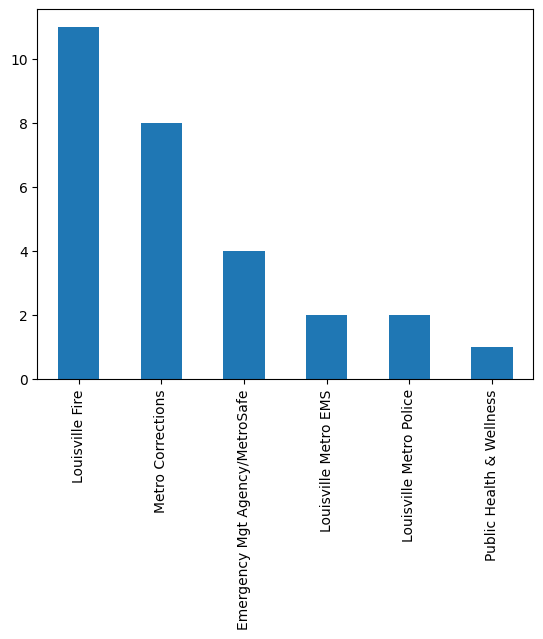

In [ ]:
df20['Department'].value_counts().plot.bar()

regular rate = s
<br>
s/2080 = h
<br>
h * 40 = w
<br>
o = h * 1.5
<br>
o * 26.67 == w  

In [ ]:
df.head(1)

,CalYear,Employee_Name,Department,jobTitle,Annual_Rate,Regular_Rate,Overtime_Rate,Incentive_Allowance,Other,YTD_Total,ObjectId,Hr_Rate,Ot_Rate,Hr_Worked
9291,2023,"Ingram, Lydia Ann",Louisville Metro Police Department,LMPD Service Center Technician,41995.20,0.00,151.43,0.00,0.00,151.43,9292,0.00,0.00,inf


In [ ]:
df['Hr_Rate'] = df['Regular_Rate'] / 2080
df['Ot_Rate'] = df['Hr_Rate'] * 1.5
df['Hr_Worked'] = df['Overtime_Rate'] / df['Ot_Rate'] / 52 + 40
df.head()

,CalYear,Employee_Name,Department,jobTitle,Annual_Rate,Regular_Rate,Overtime_Rate,Incentive_Allowance,Other,YTD_Total,ObjectId,Hr_Rate,Ot_Rate,Hr_Worked
9291,2023,"Ingram, Lydia Ann",Louisville Metro Police Department,LMPD Service Center Technician,41995.20,0.00,151.43,0.00,0.00,151.43,9292,0.00,0.00,inf
12002,2023,"Watson, Danny W",Parks & Recreation,Golf Operations Supervisor I,44075.20,0.00,84.76,0.00,1084.10,1168.86,12003,0.00,0.00,inf
955,2022,"Nicholson, David L",Other Statutory Obligations,Ex Officio Librarian-Law Libr,1300.00,350.00,1100.00,0.00,0.00,1450.00,956,0.17,0.25,123.81
35977,2018,"Manley, George",Metro Corrections,Corrections Sergeant,54745.60,54806.09,129395.54,0.00,3720.57,187922.20,35978,26.35,39.52,102.96
8740,2023,"Herndon, Adam B",Louisville Fire,Fire Apparatus Operator 56hr,67362.05,29236.09,67251.84,20709.72,485.76,117683.41,8741,14.06,21.08,101.34
